<a href="https://colab.research.google.com/github/nadyamissun/ROTATION-FOREST/blob/main/Kaggle_Heart_Failure_Prediction_using_Rotation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://raw.githubusercontent.com/nadyamissun/ROTATION-FOREST/main/rot_hed.jpg"  align = "center">(remake: [**source**](https://www.freepik.com/free-vector/poster-birds-forest_4265856.htm#page=1&query=forest&position=15)) 


<h1><font size = 10>Kaggle Heart Failure Prediction using Rotation Forest</font></h1>

## Sapa salam dulu

Halo teman-teman, Pada tulisan ini kita akan berdiskusi mengenai penerapan rotation forest  pada Data Heart Failure menggunakan Python.

Data ini didapat dari [**Kaggle**](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).

**Catatan**: Terdapat 13 kolom, dimana 12 variabel independen (fitur) dan 1 variabel dependen (target),  yang dapat digunakan untuk memprediksi kematian akibat gagal jantung menggunakan <i>rotation forest</i>. Yuk mari kita coba!

Sebelumnya kita telah berkenalan dengan Rotation Forest di [**Medium**](https://nadyasanul.medium.com/yuk-bahas-rotation-forest-9598100b7620). Jika teman-teman tertarik menerapkan rotation forest di R silahkan kunjungi [**RPubs**](https://rpubs.com/nadyamissun/rotationforest) kami.

------------

## Izin dulu sama google colab ya!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Yuk kita jelajah Data nya <a id="0"></a>


pertama-tama kita harus meng-import package untuk membaca data

In [2]:
import numpy as np 
import pandas as pd 

Penjelasan data ini didapat dari [**Jurnal**](https://doi.org/10.1186/s12911-020-1023-5) yang menggunakan data yang sama

In [3]:
import plotly.graph_objects as go

values = [['Age', 'Anaemia', 'High blood pressure','Creatinine phosphokinase', 'Diabetes', 'Ejection fraction', 'Sex', 'Platelets', 'Serum creatinine', 'Serum sodium', 'Smoking', 'Time', '(target) death event'], #1st col
  ["Menjelaskan usia subjek dalam kumpulan data",
"Kondisi di mana seseorang kekurangan sel darah merah",
"Tingkat enzim CPK dalam darah",
"Penyakit metabolisme yang menyebabkan gula darah tinggi",
"Persentase darah yang keluar",
"Menunjukkan apakah tekanan darah tinggi atau tidak",
"Jumlah trombosit dalam darah",
"Mengukur tingkat kreatinin dalam darah dan memberikan perkiraan seberapa baik ginjal menyaring",
"Tingkat natrium dalam darah", 
"Laki-laki atau Perempuan",
"Ya atau Tidak",
"Waktu",
"Meninggal atau Tidak Meninggal"]]


fig = go.Figure(data=[go.Table(
  columnorder = [1,2],
  columnwidth = [50,80],
  header = dict(
    values = [['<b>FITUR</b><br>'],
                  ['<b>DESKRIPSI</b>']],
    line_color='black',
    fill_color='#144970',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=30
  ),
  cells=dict(
    values=values,
    line_color='black',
    fill=dict(color=['white', 'white']),
    align=['left', 'center'],
    font_size=12,
    height=30)
    )
])
fig.show()

Lalu setelah kita mengetahui informasi mengenai data tersebut kita coba membaca datanya.

In [4]:
data = pd.read_csv('/content/drive/My Drive/GITHUB/Heart Failure Prediction/jantung.csv')

Nah, kalau ini kita sedang melihat 5 data teratas dari data kita

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Kalau ini kita sedang melihat 5 data terbawah dari data kita

In [6]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


`info()` berfungsi untuk mendapatkan informasi dasar mengenai data yang kita gunakan

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Untuk melihat dimensi data kita dapat menggunakan .shape

In [8]:
data.shape

(299, 13)

Untuk mengetahui ringkasan statistika data kita, kita bisa menggunakan `describe()`

In [9]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Untuk mengetahui data yang hilang, kita bisa menggunakan `isnull()`

In [10]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Melihat outlier <a id="0"></a>


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

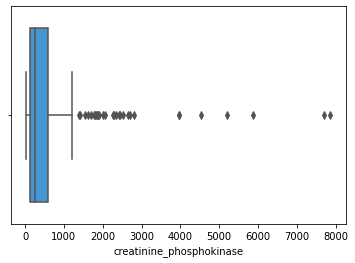

In [12]:
sns.boxplot(x = data.creatinine_phosphokinase, color = '#2e99e8')
plt.show()

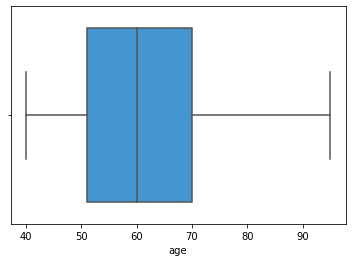

In [13]:
sns.boxplot(x = data.age, color = '#2e99e8')
plt.show()

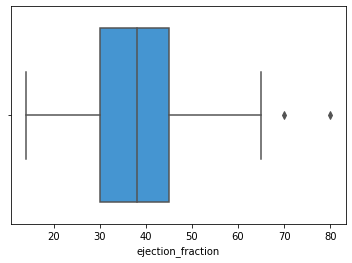

In [14]:
sns.boxplot(x = data.ejection_fraction, color = '#2e99e8')
plt.show()

In [15]:
lihat = data[data['ejection_fraction']<70]

In [16]:
lihat

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


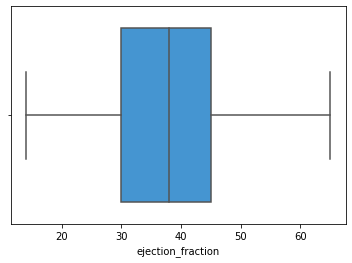

In [17]:
sns.boxplot(x = lihat.ejection_fraction, color = '#2e99e8')
plt.show()

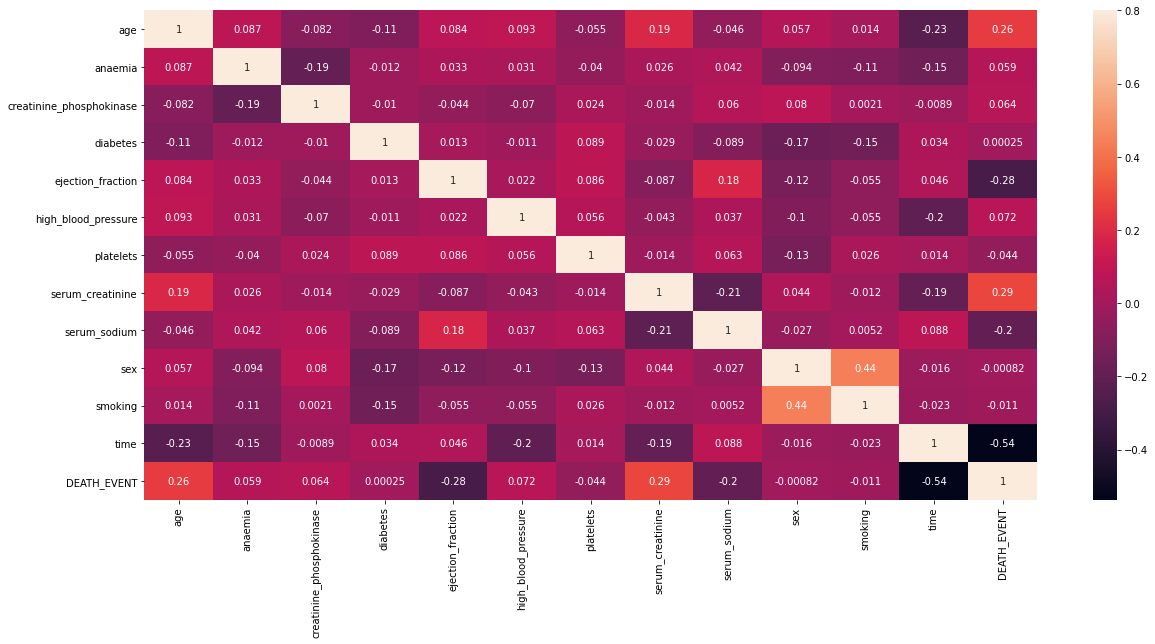

In [18]:
#Matriks Korelasi
matkor = lihat.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(matkor, vmax=.8, annot=True);

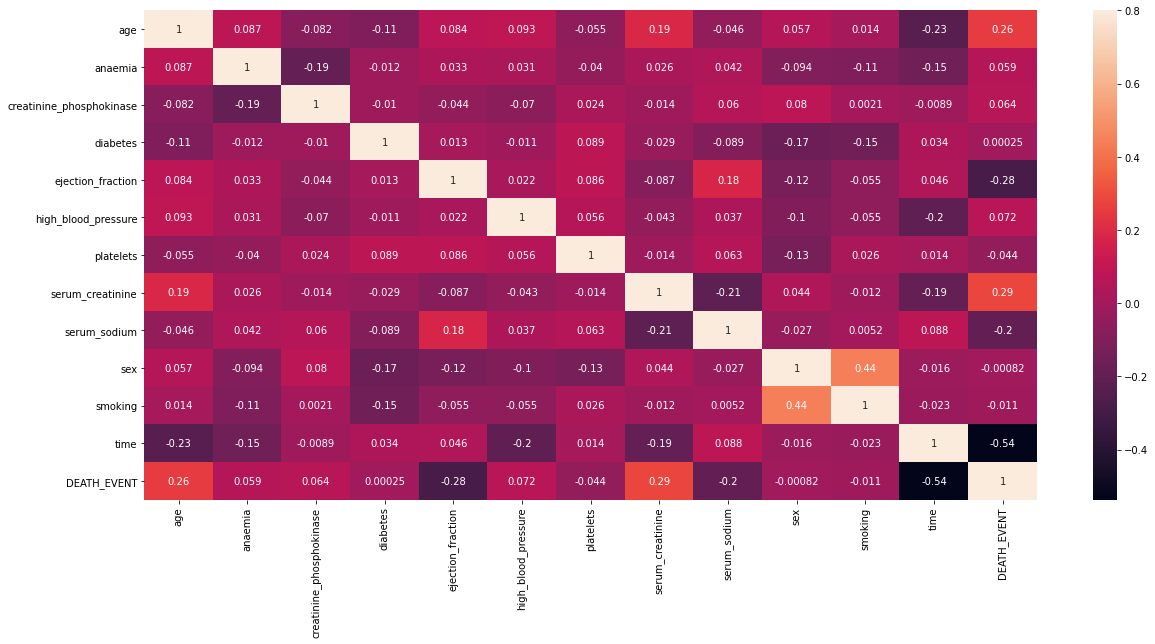

In [19]:
#Matriks Korelasi
matkor2 = data.corr()
g, bx = plt.subplots(figsize=(20, 9))
sns.heatmap(matkor, vmax=.8, annot=True);

---
# Model Rotation Forest<a id="8"></a>

Pada pembentukkan  model menggunakan metode <i>rotation forest</i>, untuk menangani data tidak seimbang <i>(imbalance data)</i>, pada tulisan ini akan menggunakan metode <i>oversampling</i> untuk penanganan data tidak seimbang. 

In [20]:
y = data['DEATH_EVENT']
y.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

0    203
1     96
Name: DEATH_EVENT, dtype: int64


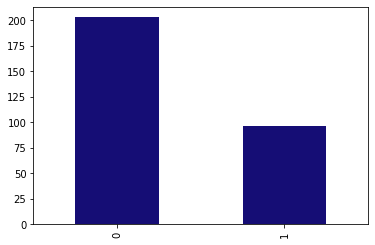

In [21]:
y.value_counts().plot.bar(color = '#150d75')
print(y.value_counts())

Pada gambar diatas dapat dipastikan bahwa dataset imbalance, karena jumlah pasien yang hidup (peristiwa kematian = 0) sebanyak 203, sedangkan yang meninggal (peristiwa kematian = 1) sebanyak 96. Secara statistik terdapat 32,11% positif dan 67,89% negatif.

In [22]:
x = data.iloc[:,0:-1]
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [23]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [24]:
smote = SMOTE()
X_sm, y_sm = smote.fit_sample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [25]:
kolom = x.columns

In [26]:
kolom

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [27]:
df1 = pd.DataFrame(X_sm, columns=kolom) 

In [28]:
df1['label'] = y_sm

1    203
0    203
dtype: int64


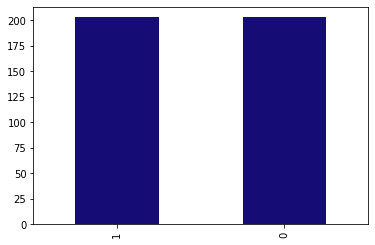

In [29]:
pd.Series(y_sm).value_counts().plot.bar(color = '#150d75')
print(pd.Series(y_sm).value_counts())

In [30]:
baru = df1.drop_duplicates()

In [31]:
baru.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,label
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1


In [32]:
baru.shape

(406, 13)

In [33]:
print(len(baru))

406


In [34]:
fitur = baru.iloc[:,:-1]
fitur.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0


In [35]:
target = baru['label']

1    203
0    203
Name: label, dtype: int64


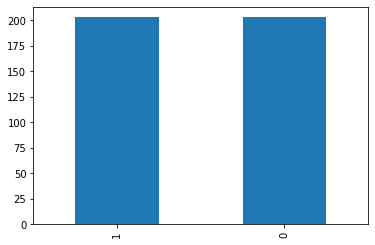

In [36]:
pd.Series(target).value_counts().plot.bar()
print(pd.Series(target).value_counts())

## Splitting Data <a id="10"></a>

Membagi data menjadi data latih dan data uji

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(fitur, target, test_size = 0.2, random_state =0)

In [38]:
y_test = y_test.tolist()

In [39]:
y_train = y_train.tolist()

In [40]:
df_evaluasi = pd.DataFrame(columns = ['Metode', 'Recall/Sensitivity', 'Specificity','Precision','Accuracy', 'MCC','Running Time', 'Keterangan'])

In [41]:
def eval1(tn, fp, fn, tp):
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    akurasi = (tp+tn)/(tp+tn+fp+fn)
    presisi = tp/(tp+fp)
    f_measure = 2*(sensitivity*presisi)/(sensitivity+presisi)
    mcc = ((tp*tn)-(fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    print('sensitivity = ' + str(sensitivity))
    print('specificity = '+str(specificity))
    print('akurasi = ' + str(akurasi))
    print('presisi = ' + str(presisi))
    print('f_measure = ' + str(f_measure))
    print('mcc = ' + str(mcc))

In [42]:
!pip install rotation_forest

In [43]:
from rotation_forest import RotationForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
import math

In [44]:
model = RotationForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
b = confusion_matrix(y_pred, y_test)
tn = b[0,0]
fn = b[0,1]
fp = b[1,0]
tp = b[1,1]
eval1(tn,fp,fn,tp)

sensitivity = 0.7872340425531915
specificity = 0.7714285714285715
akurasi = 0.7804878048780488
presisi = 0.8222222222222222
f_measure = 0.8043478260869565
mcc = 0.5552971459226258


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning:

The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning:

The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning:

The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning:

The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'p